In [88]:
%reset -f

In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [90]:
def rewrite_file(file):
    file_data = ""
    newfile = 'temp.txt'
    newfile_data = ""
    strings = ['#***Warning:','***Warning:','#*** Warning:','Value','Variances',
                'pegged','insensitive','Due','instead','opt','show',
                '#Apparent','#Current','#and','#but','#Suggest',
                'attempt:','will automatically exit','setpl',
                '# element, likely','version:','Date/Time:',
                "@set_linux_1.sh",'/home/songchengli/','!XSPEC12>@mytclscript.tcl',
                '!XSPEC12>proc','fit','Channels','Time','File','Instrument','spectra',
                'hypothesis','d.o.f.','tcl','channels','diskbb','Spectrum','spectrum',
                'Data group:','bins.','comp','TBabs','constant','Group','ign',
                'newpar','parallel','Covariance','parameters','data','sff','thaw','parameter',
                'kerrbb','simplcutx','Model','+/-','relxillCp','Parameters']
    with open(file, "r", encoding="utf-8") as f:
        for line in f:
            copy = True
            for string in strings:
                if string in line:
                    copy = False
            if line == '#\n':
                copy = False
            if copy == True:
                if '!XSPEC12>steppar' in line:
                    line = line.replace('!XSPEC12>steppar','!XSPEC12> steppar')
                file_data += line
    with open(newfile,"w",encoding="utf-8") as f:
        f.write(file_data)
        f.close()   
    with open(newfile,"r",encoding="utf-8") as f:
        start_index = 0
        end_index = 0
        for x in enumerate(f):
            copy = False
            start = False
            index = x[0]
            line = x[1]
            if len(line.split()) < 2:
                continue
            if line.split()[0] == '!XSPEC12>' and line.split()[1] == 'steppar':
                start = True
                start_index = index
                if len(line.split()) == 6:
                    end_index = index + 2 + int(line.split()[-1]) + 1
            if index >= start_index and index <= end_index and index != 0:
                copy = True
            elif index > end_index:
                start_index = 0
                end_index = 0   
            if index == 0:
                copy = True
                start = True
            if copy == True:
                if start == True:
                    newfile_data += '###start file###\n'
                newfile_data += line            
    with open('temp_steppar.txt','w',encoding="utf-8") as f:
        f.write(newfile_data)
    os.remove('temp.txt')

In [91]:
def divide_file(file):
    start_index = []
    end_index = []
    line_num = 0
    with open(file, 'r') as f:
        for index, line in enumerate(f):
            if 'start file' in line:
                start_index.append(int(index))
            line_num += 1
    for i in range(len(start_index)):
        if i < 1:
            continue
        else:
            end_index.append(int(start_index[i])-1)
    end_index.append(line_num)
    
    file_index = range(len(start_index))
    for i in file_index:
        with open('steppar_temp_%d.txt'%i, 'w') as output:
            with open(file,'r') as input:
                for index, line in enumerate(input):
                    if index >= start_index[i] and index <= end_index[i]:
                        output.write(line)
                    

In [92]:
def get_chisq(infile):
    f = open(infile, 'r')
    lines = f.readlines()
    y_str = []
    for line in lines:
        if len(line.split()) == 5:
            y_str.append(line.split()[1])
    y = list(map(float, y_str))
    return y

In [93]:
def get_par(infile):
    f = open(infile, 'r')
    lines = f.readlines()
    x_str = []
    for line in lines:
        if len(line.split()) == 5:
            x_str.append(line.split()[-1])
    x = list(map(float, x_str))
    return x

In [94]:
def get_name(file):
    f = open(file, 'r')
    lines = f.readlines()
    name = ''
    for line in lines:
        if len(line.split()) == 4:
            if line.split()[1] == 'Chi-Squared':
                name = line.split()[-1]
    return name

In [95]:
def plot_steppar_single_file(infile):
    x = get_par(infile)
    y = get_chisq(infile)
    fig,ax = plt.subplots(1,1)
    ax.plot(x, y)
    ax.set_title('steppar')
    ax.set_xlabel(get_name(infile))
    plt.show()

In [96]:
def plot_steppar_multiple_files(files:list):
    for file in files:
        plot_steppar_single_file(file)

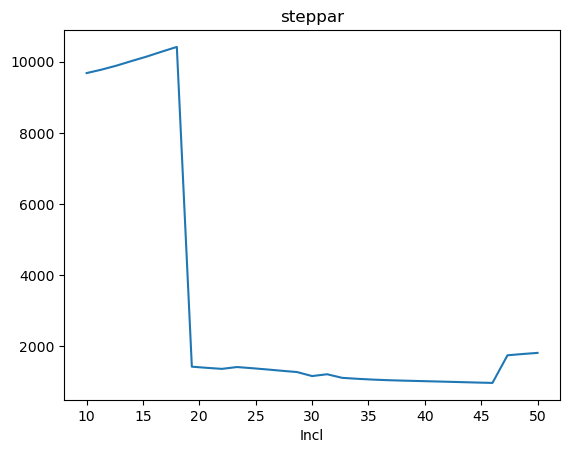

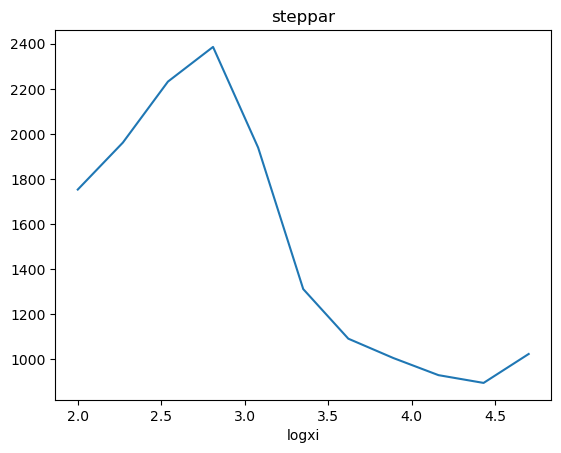

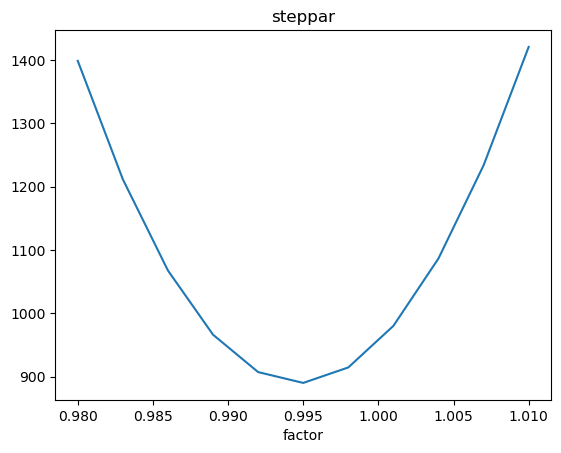

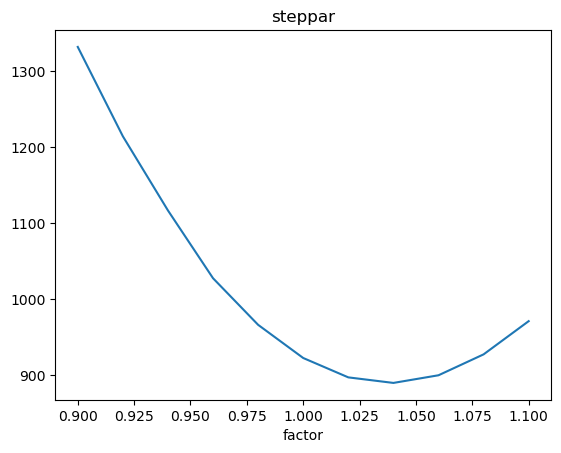

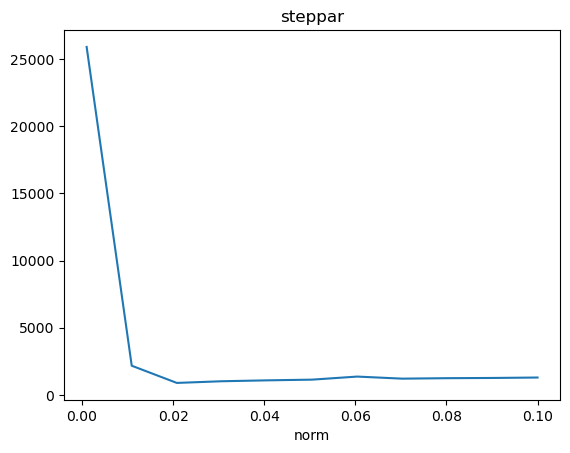

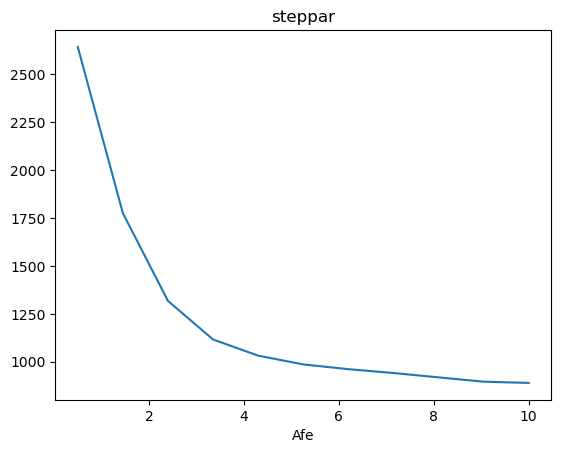

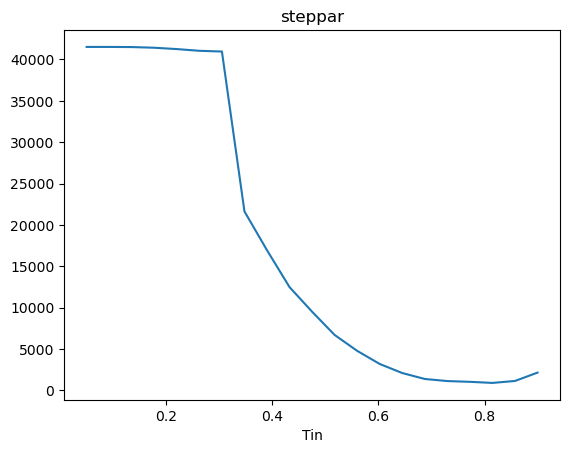

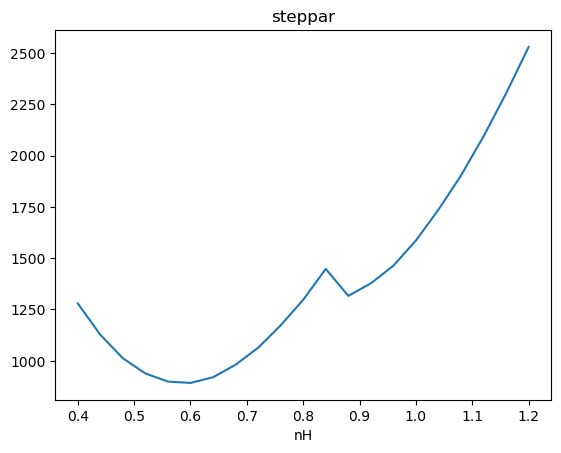

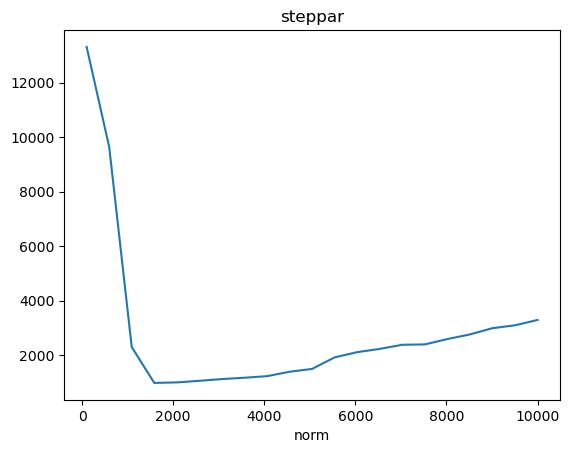

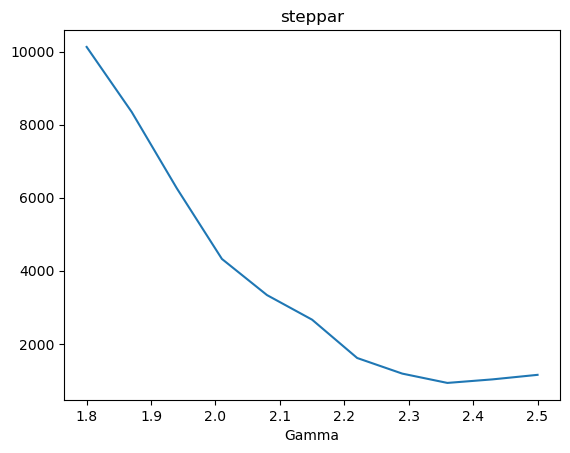

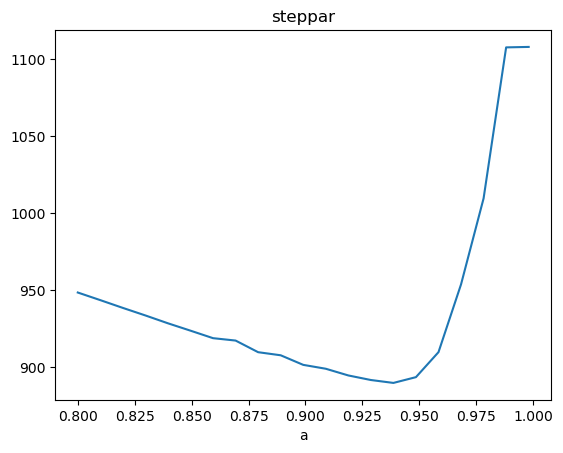

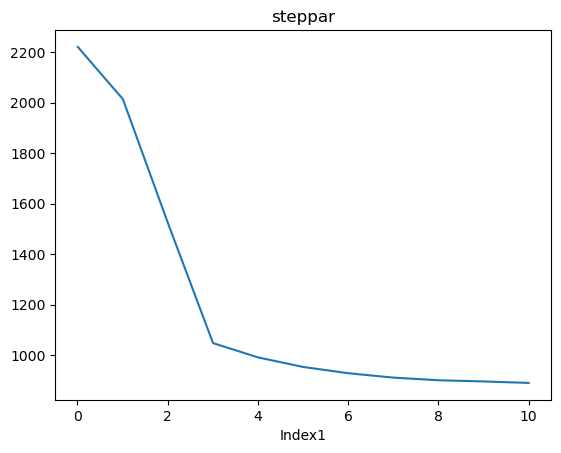

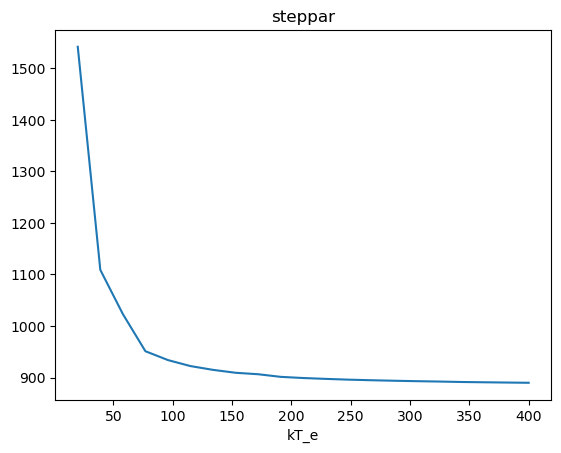

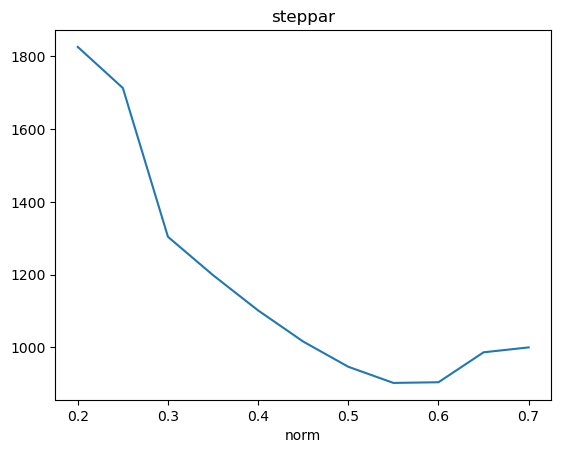

In [97]:
rewrite_file('diskbb_relCp_no-br.txt')
divide_file('temp_steppar.txt')

path = "./"
dirs = os.listdir(path)
##能不能按参数的顺序画啊，怎么是乱序的？
#这里需要一个对dirs按名称排序
temp_file = []
for name in dirs:
    if len(name.split('.')) < 2 or len(name.split('_')) < 3: 
        continue
    if name.split('.')[-1] == 'txt' and name.split('_')[1] == 'temp' and name.split('_')[0] == 'steppar':
        temp_file.append(name)
        
plot_steppar_multiple_files(temp_file)

# for file in temp_file:
#     os.remove(file)

# os.remove('temp_steppar.txt')